**FEATURE IMPORTANCE**



SK Learn Feature Selection can be used for feature selection or dimenstionality reduction on datasets either to improve estimators accuracy score or boost there performance.


SK Learn Feature Selection can  be used to perform :


*   Removing features with low Variance.
*   Univariate Feature Selection.

*   Recursive Feature Elimination.
*   Sequential Feature Selection.

*   Feature Selection as part of a pipeline.

















In this notebook we will be performing **Variance Threshold**

Removing features with constanst features which are not important for solving the problem statement.

Variance Threshold is a feature selector that removes all the features whose variance doesn't meet some threshold.By default it removes all zero-variance features or low variance features from the dataset that are no great use in modeling.

This feature selection looks at all the features X and not the output y



In the **input** we have columns which have constant features, using variance threshold we will detect the columns which have constant values and will be dropping those columns.

In [13]:
#Import modules
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

In [14]:
sampleData = pd.DataFrame({"A":[3,8,9,6,5,0,1,4],
                           "B":[7,9,4,3,2,1,3,8],
                           "C":[2,2,2,2,2,2,2,2],
                           "D":[1,1,1,1,1,1,1,1]})

In [15]:
sampleData

,A,B,C,D
0,3,7,2,1
1,8,9,2,1
2,9,4,2,1
3,6,3,2,1
4,5,2,2,1
5,0,1,2,1
6,1,3,2,1
7,4,8,2,1


Applying Variance Thresshold

In [16]:
variance_threshold = VarianceThreshold(threshold=0)
variance_threshold.fit(sampleData)

VarianceThreshold(threshold=0)

In [17]:
variance_threshold.get_support() #False indicate the constant values

array([ True,  True, False, False])

In [18]:
sampleData.columns[variance_threshold.get_support()]

Index(['A', 'B'], dtype='object')

In [19]:
sum(variance_threshold.get_support()) 

2

In [20]:
constant_columns = [column for column in sampleData.columns
                    if column not in sampleData.columns[variance_threshold.get_support()]]

print(len(constant_columns))  #checking the number of constant columns

2


In [21]:
#column names which have constant values
for feature in constant_columns:
  print(feature)  

C
D


In [22]:
#Dropping the columns having constant values
sampleData.drop(constant_columns,axis=1)
#This is our expected output

,A,B
0,3,7
1,8,9
2,9,4
3,6,3
4,5,2
5,0,1
6,1,3
7,4,8


**Pearson Correlation**

Here we will remove the features which are highly correlated.

In 

In [23]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
#import data
url = "https://github.com/nikbearbrown/Visual_Analytics/raw/main/CSV/wine.csv"
wine_data = pd.read_csv(url)
wine_data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [25]:
list(wine_data.columns)

['Wine',
 'Alcohol',
 'Malic.acid',
 'Ash',
 'Acl',
 'Mg',
 'Phenols',
 'Flavanoids',
 'Nonflavanoid.phenols',
 'Proanth',
 'Color.int',
 'Hue',
 'OD',
 'Proline']

In [26]:
#creating independent and dependent features
X = wine_data.drop("OD",axis=1)
y=wine_data["OD"] # target variable, dependent

In [27]:
#splitting data into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    wine_data.drop("OD",axis=1),
    wine_data["OD"],
    test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((124, 13), (54, 13))

In [28]:
X_train.corr() #correlation between independent variables

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,Proline
Wine,1.000000,-0.325056,0.452893,0.010401,0.537447,-0.129833,-0.744282,-0.883013,0.532156,-0.500462,0.264039,-0.626769,-0.641289
Alcohol,-0.325056,1.000000,0.087268,0.228809,-0.326030,0.212436,0.352899,0.296712,-0.167773,0.095713,0.565029,-0.047430,0.627676
Malic.acid,0.452893,0.087268,1.000000,0.200015,0.304109,-0.059823,-0.298813,-0.408887,0.363213,-0.190354,0.305012,-0.545493,-0.200906
Ash,0.010401,0.228809,0.200015,1.000000,0.446093,0.181737,0.121369,0.060808,0.185052,-0.025868,0.243573,-0.108399,0.158194
Acl,0.537447,-0.326030,0.304109,0.446093,1.000000,-0.088590,-0.367199,-0.414673,0.398878,-0.255579,-0.030653,-0.251091,-0.481131
Mg,-0.129833,0.212436,-0.059823,0.181737,-0.088590,1.000000,0.163801,0.143421,-0.305155,0.270090,0.125051,0.057459,0.312073
Phenols,-0.744282,0.352899,-0.298813,0.121369,-0.367199,0.163801,1.000000,0.874093,-0.450308,0.614683,-0.068791,0.453501,0.558725
Flavanoids,-0.883013,0.296712,-0.408887,0.060808,-0.414673,0.143421,0.874093,1.000000,-0.578595,0.660619,-0.190290,0.578615,0.553097
Nonflavanoid.phenols,0.532156,-0.167773,0.363213,0.185052,0.398878,-0.305155,-0.450308,-0.578595,1.000000,-0.351086,0.153267,-0.315259,-0.361626
Proanth,-0.500462,0.095713,-0.190354,-0.025868,-0.255579,0.270090,0.614683,0.660619,-0.351086,1.000000,-0.069615,0.320218,0.352654


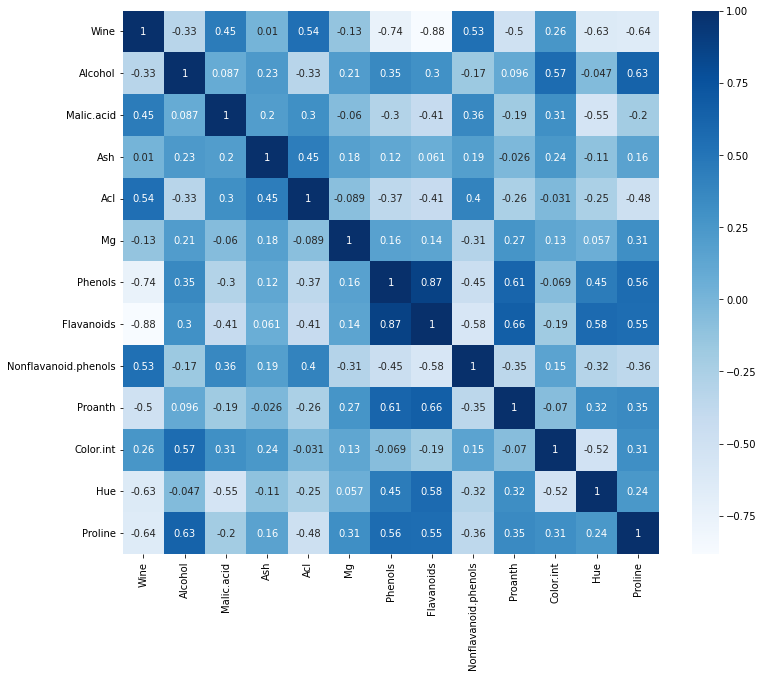

In [29]:
# Using Pearson Correlation
import seaborn as sns
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.Blues)
plt.show()

In [30]:
#Selecting highly correlated feature, this will remove the first feature which is highly correlated with the other feature
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname =  corr_matrix.columns[i] #getting column names
        col_corr.add(colname)

  return col_corr        


In [31]:
corr_features = correlation(X_train, 0.7) #setting threshold to 0.7
len(set(corr_features)) 
#to check the number of features which are highly correlated

2

In [32]:
corr_features

{'Flavanoids', 'Phenols'}

In [33]:
#dropping the correlated features in both X_train and X_test
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Nonflavanoid.phenols,Proanth,Color.int,Hue,Proline
54,1,13.74,1.67,2.25,16.4,118,0.21,1.62,5.85,0.92,1060
151,3,12.79,2.67,2.48,22.0,112,0.24,1.26,10.80,0.48,480
63,2,12.37,1.13,2.16,19.0,87,0.19,1.87,4.45,1.22,420
55,1,13.56,1.73,2.46,20.5,116,0.20,2.45,6.25,0.98,1120
123,2,13.05,5.80,2.13,21.5,86,0.30,2.01,2.60,0.73,380
121,2,11.56,2.05,3.23,28.5,119,0.47,1.87,6.00,0.93,465
7,1,14.06,2.15,2.61,17.6,121,0.31,1.25,5.05,1.06,1295
160,3,12.36,3.83,2.38,21.0,88,0.50,1.04,7.65,0.56,520
106,2,12.25,1.73,2.12,19.0,80,0.37,1.63,3.40,1.00,510
90,2,12.08,1.83,2.32,18.5,81,0.52,1.64,2.40,1.08,480
